In [1]:
import sys
import os

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils.integral import grid
from Models.clustering import EMIFCF, IFCF
from utils.vis import plotHeatmap_U, plotPDF_Theta, plot_OF, temp, plot_silhouette_values, plot_CVI_with_k

In [3]:
# Load the .npz file
data = np.load("../dataset/G_data.npz")
F_data = data['G_data']
grid_x = data['grid_x']
bandwidth = data['bandwidth']

In [ ]:
cluster_EMIFCF=EMIFCF.Model(
   grid_x=grid_x,
   seed=5,
    num_clusters=2,
    fuzziness= 2,
    init= 'random',
    max_iterations= 100,
    tolerance= 1e-6,
    distance_metric= 'BC',
    verbose = True,
    delta_prime=0.05,
 )
cluster_EMIFCF.fit(F_data)
U_EMIFCF, Theta_EMIFCF, J_EMIFCF = cluster_EMIFCF.get_results()
labels_EMIFCF = cluster_EMIFCF.get_hard_assignments()

[EM-IFCM] it=001 | dU=9.465e+00 | dTheta=0.000e+00 | ΔJ=inf | J=3.375061e-02 | Omega=[369.16131668 560.83868332] | δ_i=[2.037e-08, 1.576e-04]
[EM-IFCM] it=002 | dU=7.284e+00 | dTheta=6.370e-01 | ΔJ=1.602e-03 | J=3.214885e-02 | Omega=[352.05233108 577.94766892] | δ_i=[1.687e-08, 1.659e-04]
[EM-IFCM] it=003 | dU=3.343e+00 | dTheta=4.137e-01 | ΔJ=2.012e-03 | J=3.416089e-02 | Omega=[390.259107 539.740893] | δ_i=[9.807e-09, 1.781e-04]
[EM-IFCM] it=004 | dU=4.367e+00 | dTheta=1.086e-01 | ΔJ=1.056e-04 | J=3.405530e-02 | Omega=[447.09596125 482.90403875] | δ_i=[1.261e-09, 1.729e-04]
[EM-IFCM] it=005 | dU=4.970e+00 | dTheta=1.730e-01 | ΔJ=7.468e-05 | J=3.412997e-02 | Omega=[513.57722976 416.42277024] | δ_i=[5.188e-10, 1.697e-04]
[EM-IFCM] it=006 | dU=5.322e+00 | dTheta=2.007e-01 | ΔJ=6.428e-04 | J=3.477276e-02 | Omega=[585.18376684 344.81623316] | δ_i=[4.929e-10, 1.694e-04]
[EM-IFCM] it=007 | dU=5.627e+00 | dTheta=2.274e-01 | ΔJ=1.073e-03 | J=3.584616e-02 | Omega=[660.29055513 269.70944487] | δ

In [5]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# U = np.asarray(U, dtype=float)

# plt.figure(figsize=(10, 6))
# temp(fontsize=20)

# ax = sns.heatmap(
# 	U,
# 	# annot=True,
# 	# fmt=".2f",
# 	cmap="Greys",
# 	cbar=True,
# 	vmin=0.0,           # ép min = 0
# 	vmax=1.0,           # ép max = 1
# 	cbar_kws={
# 		"ticks": np.linspace(0, 1, 5),  # 0, 0.2, ..., 1.0
# 		"format": "%.2f",
# 	},
# )

# ax.set_ylabel("Cluster")
# ax.set_xlabel("PDF Index")
# ax.figure.tight_layout()
# # ax.figure.savefig("FCF_U9.pdf", bbox_inches="tight")


In [6]:
cluster_IFCF = IFCF.Model(
   grid_x=grid_x,
   seed=5,
    num_clusters=2,
    fuzziness= 2,
    init= 'random',
    max_iterations= 100,
    tolerance= 1e-6,
    distance_metric= 'BC',
    verbose = True,
 )
cluster_IFCF.fit(F_data)
U_IFCF, Theta_IFCF, J_IFCF = cluster_IFCF.get_results()
labels_IFCF = cluster_IFCF.get_hard_assignments()

[IFCM] it=001 | dU=1.401e+01 | dTheta=8.747e-01 | ΔJ=inf | J=7.950203e-02 | clusterwidth=[461.01367705 468.98632295]
[IFCM] it=002 | dU=8.836e+00 | dTheta=3.788e-01 | ΔJ=4.569e-02 | J=3.380985e-02 | clusterwidth=[494.5495551  435.45043522]
[IFCM] it=003 | dU=1.052e+01 | dTheta=3.756e-01 | ΔJ=1.260e-03 | J=3.506957e-02 | clusterwidth=[579.68766366 350.31233634]
[IFCM] it=004 | dU=1.401e+01 | dTheta=9.460e-01 | ΔJ=2.088e-02 | J=5.594817e-02 | clusterwidth=[494.01164898 435.98835101]
[IFCM] it=005 | dU=2.024e+01 | dTheta=1.088e+00 | ΔJ=8.366e-03 | J=4.758210e-02 | clusterwidth=[265.10545551 664.89454449]
[IFCM] it=006 | dU=2.415e+01 | dTheta=1.483e+00 | ΔJ=1.898e-01 | J=2.373363e-01 | clusterwidth=[456.88348921 473.11651079]
[IFCM] it=007 | dU=2.432e+01 | dTheta=2.625e+00 | ΔJ=1.657e-01 | J=7.166618e-02 | clusterwidth=[817.2289675 112.7710325]
[IFCM] it=008 | dU=2.873e+01 | dTheta=2.467e+00 | ΔJ=9.492e-01 | J=1.020873e+00 | clusterwidth=[516.57855812 413.42144188]
[IFCM] it=009 | dU=2.499

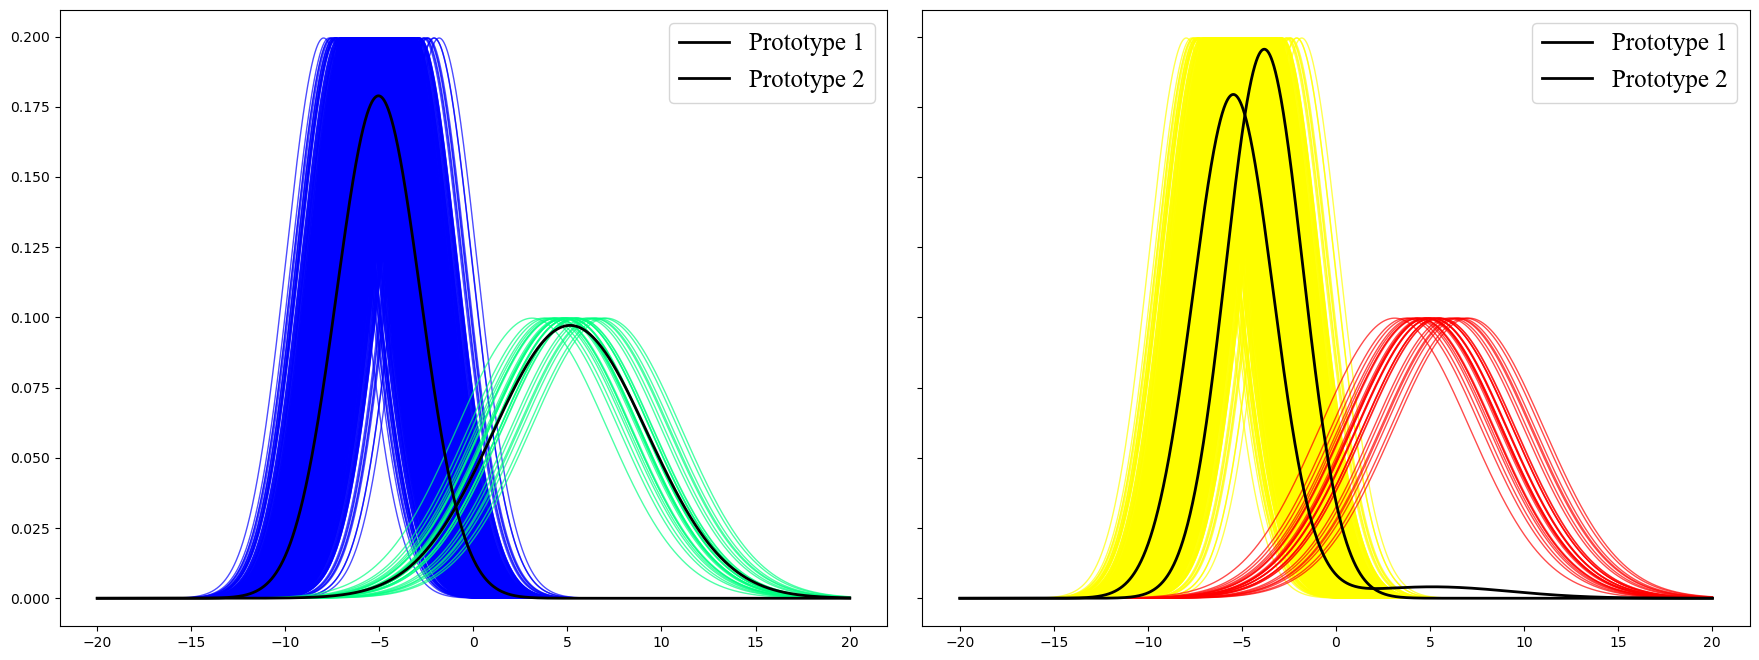

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)
temp(20)
# Plot for cluster (EMIFCF)
colors1 = plt.cm.winter(np.linspace(0, 1, cluster_EMIFCF.num_clusters))
styles1 = ['-'] * (cluster_EMIFCF.num_clusters + 1)
for i in range(F_data.shape[0]):
	cluster_idx = labels_EMIFCF[i]
	axes[0].plot(grid_x, F_data[i], lw=1, color=colors1[cluster_idx], linestyle=styles1[cluster_idx], alpha=0.7)
for j in range(cluster_EMIFCF.num_clusters):
	axes[0].plot(grid_x, Theta_EMIFCF[j, :], lw=2, color='black', linestyle=styles1[j], label=f'Prototype {j+1}')
axes[0].legend()

# Plot for cluster_IFCF
colors2 = plt.cm.autumn(np.linspace(0, 1, cluster_IFCF.num_clusters))
styles2 = ['-'] * (cluster_IFCF.num_clusters + 1)
for i in range(F_data.shape[0]):
	cluster_idx = labels_IFCF[i]
	axes[1].plot(grid_x, F_data[i], lw=1, color=colors2[cluster_idx], linestyle=styles2[cluster_idx], alpha=0.7)
for j in range(cluster_IFCF.num_clusters):
	axes[1].plot(grid_x, Theta_IFCF[j, :], lw=2, color='black', linestyle=styles2[j], label=f'Prototype {j+1}')
axes[1].legend()

plt.tight_layout()
plt.show()